Logistic regression. Using the data provided (Logistic_regression_ls.csv), plot the decision boundary (linear) using Optimization of the sigmoid function.

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving Logistic_regression_ls.csv to Logistic_regression_ls.csv


<ipython-input-27-679128c9466b>:20: RuntimeWarning: divide by zero encountered in log
  J += (-y[i] * np.log(sigmoid(np.dot(x[i], weights))) - (1 - y[i]) * np.log(1 - sigmoid(np.dot(x[i], weights)))) / m
<ipython-input-27-679128c9466b>:20: RuntimeWarning: invalid value encountered in scalar multiply
  J += (-y[i] * np.log(sigmoid(np.dot(x[i], weights))) - (1 - y[i]) * np.log(1 - sigmoid(np.dot(x[i], weights)))) / m


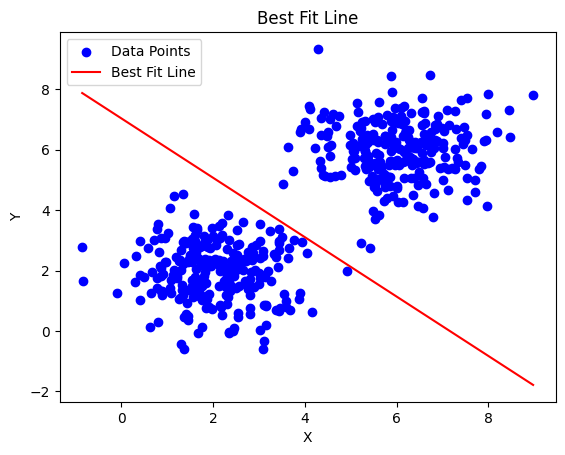

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_regression(x, y):
    n = 3         # Number of features + 1
    m = len(x)     # Number of samples

    weights = np.random.randint(1,10,n)
    cost = []
    iter = 4000
    alpha = 0.01

    while iter > 0:
        J = 0
        for i in range(m):
            J += (-y[i] * np.log(sigmoid(np.dot(x[i], weights))) - (1 - y[i]) * np.log(1 - sigmoid(np.dot(x[i], weights)))) / m
        cost.append(J)

        J_gradient = np.zeros(n)
        for i in range(m):
            for j in range(n):
                J_gradient[j] += (sigmoid(np.dot(x[i], weights)) - y[i]) * x[i][j]

        J_gradient = J_gradient * (1 / m)
        weights = weights - alpha * J_gradient

        iter -= 1

    return weights, cost

data = pd.read_csv('Logistic_regression_ls.csv')
a = data.apply(lambda x: [1, x['x1'], x['x2']], axis=1)
b = data['label']
X = np.array(a)
Y = np.array(b)

weights, cost_cross_entropy = cross_entropy_regression(X, Y)

px = np.linspace(np.min(data['x1']), np.max(data['x1']), 100)
py = -(weights[1] * px +weights[0]) / weights[2]

# Plotting the best fit line
plt.figure()
plt.scatter(data['x1'], data['x2'], marker='o', color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best Fit Line')
plt.plot(px,py, color='red', label='Best Fit Line')
plt.legend()

